In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Advertising.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [37]:
df.nunique()


TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.shape

(200, 4)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [41]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


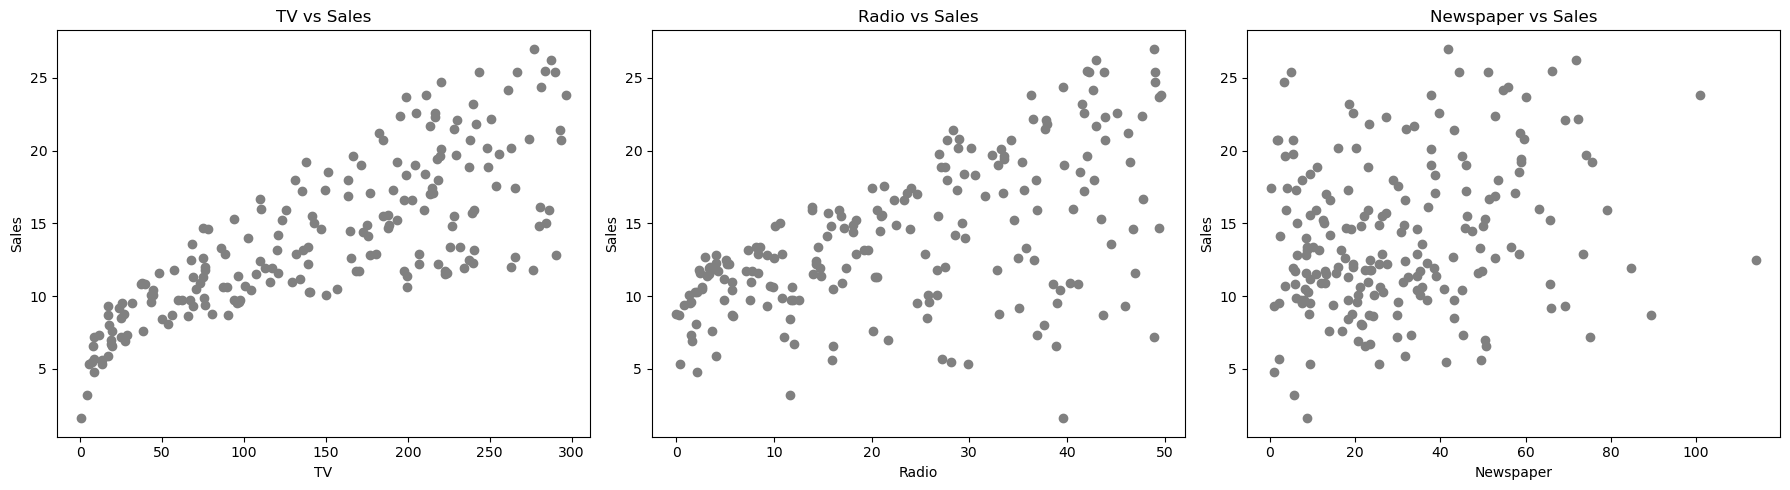

In [42]:
#Buat scatter plot utk masing masing variabel terhadap sales
fig, axs= plt.subplots(1,3,figsize=(18,5))

#Scatterplot antara TV dan Sales
axs[0].scatter(df['TV'], df['Sales'], color='gray')
axs[0].set_title('TV vs Sales')
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')

#Scatterplot antara Radio dan Sales 
axs[1].scatter(df['Radio'], df['Sales'], color='gray')
axs[1].set_title('Radio vs Sales')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')

#Scatterplot antara Newspaper vs Sales
axs[2].scatter(df['Newspaper'], df['Sales'], color='gray')
axs[2].set_title('Newspaper vs Sales')
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [43]:
#Pisahkan X dan y

In [44]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [45]:
#Split train & Test dulu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.isnull().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

In [47]:
X_test.isnull().sum()


TV           0
Radio        0
Newspaper    0
dtype: int64

In [48]:
y_train.isnull().sum()

np.int64(0)

In [49]:
y_test.isnull().sum()

np.int64(0)

In [50]:
#Cek outlier

Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

outliers = ((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR)))

for col in X_train.columns:
    jumlah = outliers[col].sum()
    persen = (jumlah / len(X_train)) * 100
    print(f"{col}: {jumlah} data ({persen:.2f}%) outlier")


TV: 0 data (0.00%) outlier
Radio: 0 data (0.00%) outlier
Newspaper: 1 data (0.62%) outlier


In [51]:
from scipy.stats import skew

# Hitung skewness setiap kolom
X_train.apply(skew)




TV          -0.093150
Radio        0.130306
Newspaper    0.700071
dtype: float64

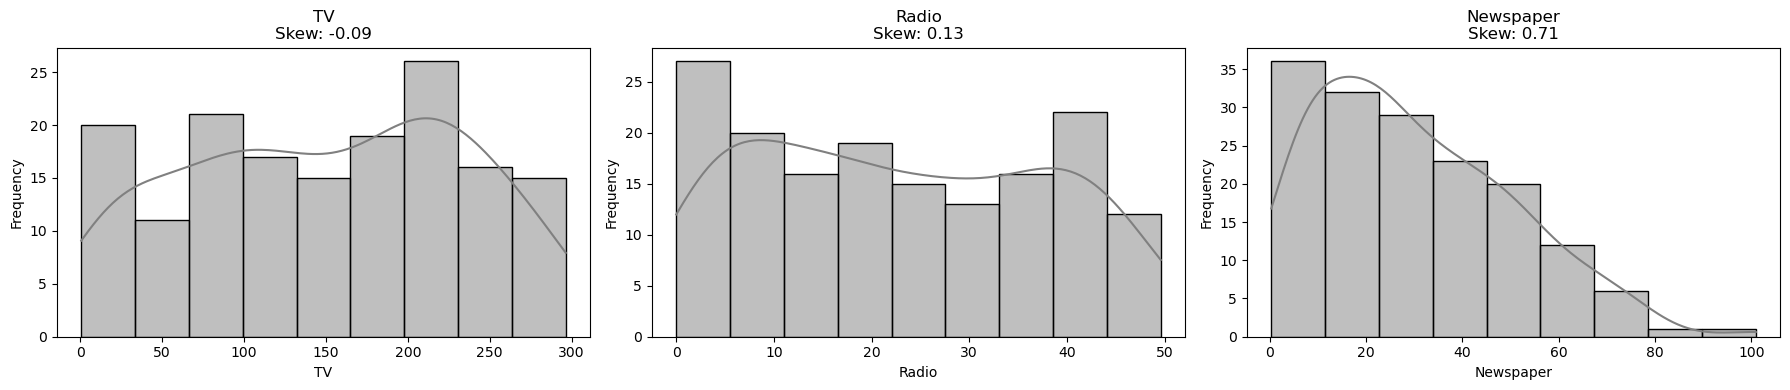

In [52]:
plt.figure(figsize=(18, 4))

for i, col in enumerate(X_train.columns):
    plt.subplot(1, len(X_train.columns), i + 1)
    sns.histplot(X_train[col], kde=True, color='gray')
    plt.title(f'{col}\nSkew: {X_train[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
#Sebelumnya di coba log transform skewness masih ada
#Karena cbrt di train berpengaruuh ke X_test maka kita juga tambhakan kolom tersebut ke X_test
X_train['Newspaper_cbrt'] = np.cbrt(X_train['Newspaper'])
X_test['Newspaper_cbrt'] = np.cbrt(X_test['Newspaper'])

#Pilih atua drop newspaper
X_train = X_train.drop(columns='Newspaper')
X_test = X_test.drop(columns='Newspaper')

In [54]:
from scipy.stats import skew

# Hitung skewness setiap kolom
X_train.apply(skew)

TV               -0.093150
Radio             0.130306
Newspaper_cbrt   -0.322630
dtype: float64

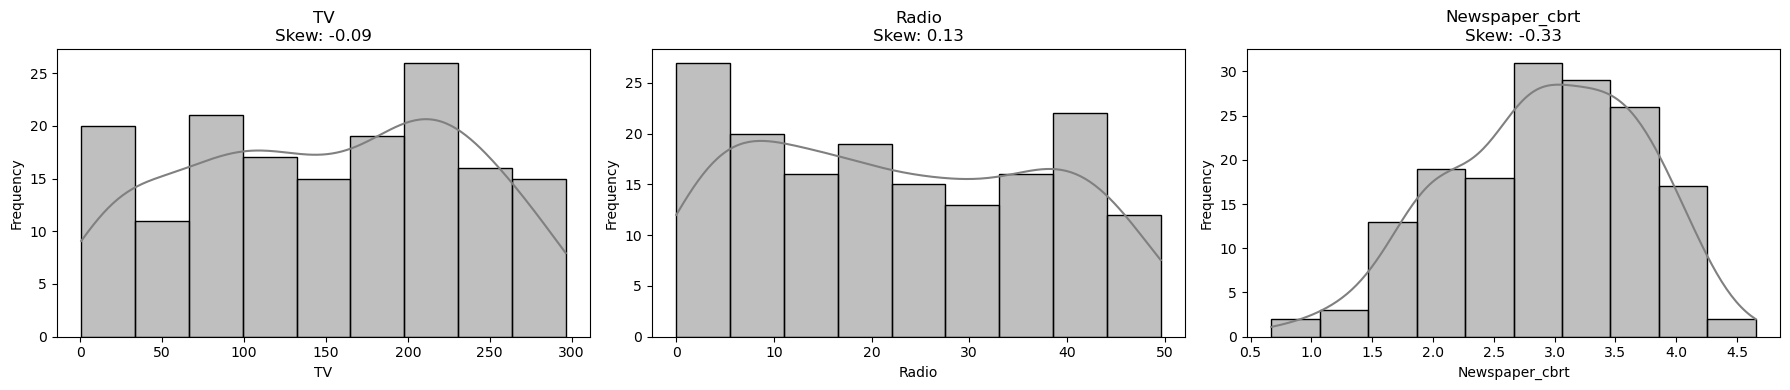

In [55]:
plt.figure(figsize=(18, 4))

for i, col in enumerate(X_train.columns):
    plt.subplot(1, len(X_train.columns), i + 1)
    sns.histplot(X_train[col], kde=True, color='gray')
    plt.title(f'{col}\nSkew: {X_train[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Keliatan skewness sudah reda

In [56]:
#Cek outlier

Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

outliers = ((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR)))

for col in X_train.columns:
    jumlah = outliers[col].sum()
    persen = (jumlah / len(X_train)) * 100
    print(f"{col}: {jumlah} data ({persen:.2f}%) outlier")


TV: 0 data (0.00%) outlier
Radio: 0 data (0.00%) outlier
Newspaper_cbrt: 0 data (0.00%) outlier


In [57]:
#Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Balik ke DataFrame
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns, index=X_test.index)


In [59]:
#Modelling

In [60]:
baseline_pred = np.mean(y_train)
baseline_pred

np.float64(14.1)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# ===== Baseline Train =====
baseline_pred_train_mean = np.mean(y_train)
baseline_train_pred = np.ones(len(y_train)) * baseline_pred_train_mean

baseline_train_mae = mean_absolute_error(y_train, baseline_train_pred)
baseline_train_mape = mean_absolute_percentage_error(y_train, baseline_train_pred)
baseline_train_mse = mean_squared_error(y_train, baseline_train_pred)
baseline_train_rmse = np.sqrt(baseline_train_mse)
baseline_train_r2 = r2_score(y_train, baseline_train_pred)

# ===== Baseline Test =====
baseline_pred_test_mean = np.mean(y_test)
baseline_test_pred = np.ones(len(y_test)) * baseline_pred_test_mean

baseline_test_mae = mean_absolute_error(y_test, baseline_test_pred)
baseline_test_mape = mean_absolute_percentage_error(y_test, baseline_test_pred)
baseline_test_mse = mean_squared_error(y_test, baseline_test_pred)
baseline_test_rmse = np.sqrt(baseline_test_mse)
baseline_test_r2 = r2_score(y_test, baseline_test_pred)

# ===== Tampilkan Hasil =====
print("=== Baseline Train Evaluasi ===")
print('MAE :', baseline_train_mae)
print('MAPE:', baseline_train_mape)
print('MSE:', baseline_train_mse)
print('RMSE:', baseline_train_rmse)
print('R2:', baseline_train_r2)

print("\n=== Baseline Test Evaluasi ===")
print('MAE :', baseline_test_mae)
print('MAPE:', baseline_test_mape)
print('MSE:', baseline_test_mse)
print('RMSE:', baseline_test_rmse)
print('R2:', baseline_test_r2)


=== Baseline Train Evaluasi ===
MAE : 4.12
MAPE: 0.39326262702499604
MSE: 25.93625
RMSE: 5.092764475213831
R2: 0.0

=== Baseline Test Evaluasi ===
MAE : 4.865625
MAPE: 0.4251706271807656
MSE: 31.563593749999995
RMSE: 5.6181486051901475
R2: 0.0


# SVM (Support Vector Machine Regressor)

In [62]:
#Default SVR
from sklearn.svm import SVR

?SVR

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Docstring:     
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`~sklearn.svm.LinearSVR` or
:class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
     Specifies the kernel type to be used in the algorithm.
     If none 

In [63]:
#Default SVR
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [64]:
#Prediksi pada data training dan data testing
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

In [65]:
#Evaluasi

from math import sqrt

# === Train ===
mae_train = mean_absolute_error(y_train, y_train_pred_svr)
mse_train = mean_squared_error(y_train, y_train_pred_svr)
rmse_train = sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_svr)
mape_train = np.mean(np.abs((y_train - y_train_pred_svr) / y_train)) * 100

# === Test ===
mae_test = mean_absolute_error(y_test, y_test_pred_svr)
mse_test = mean_squared_error(y_test, y_test_pred_svr)
rmse_test = sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_svr)
mape_test = np.mean(np.abs((y_test - y_test_pred_svr) / y_test)) * 100

# Selisih R2
r2_selisih = r2_train - r2_test

# Print hasil
print("=== SVR Train ===")
print("MAE:", mae_train)
print("MAPE:", mape_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)

print("\n=== SVR Test ===")
print("MAE:", mae_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R2:", r2_test)
print("R2 selisih:", r2_selisih)

=== SVR Train ===
MAE: 0.8116445865138306
MAPE: 11.03115428020934
MSE: 2.2947766227028796
RMSE: 1.5148520134662922
R2: 0.9115224204461756

=== SVR Test ===
MAE: 1.2175234014922005
MAPE: 12.899385188928111
MSE: 3.3742268471216335
RMSE: 1.8369068694742348
R2: 0.8930975074052956
R2 selisih: 0.01842491304088001


| Parameter   | Rule of Thumb                               |
| ----------- | ------------------------------------------- |
| **gamma**   | \~ 1 / (p \* Var(X)) atau `'scale'`         |
| **epsilon** | \~ range(y) / sqrt(n)                       |
| **C**       | dataset kecil → 0.1–1, dataset besar → 1–10 |
| kernel      | `rbf` default, linear kalau p >> n          |


In [66]:
from itertools import product
# Parameter grid manual (rule-of-thumb)
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [2, 4, 8],
    'gamma': ['scale', 0.01, 0.1]
}

# List untuk menyimpan semua hasil
results_list = []

# Loop semua kombinasi
for C_val, epsilon_val, gamma_val in product(param_grid['C'], param_grid['epsilon'], param_grid['gamma']):
    svr = SVR(kernel='rbf', C=C_val, epsilon=epsilon_val, gamma=gamma_val)
    svr.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = svr.predict(X_train_scaled)
    y_test_pred = svr.predict(X_test_scaled)
    
    # Evaluasi
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = sqrt(mse_train)
    rmse_test = sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_selisih = r2_train - r2_test
    
    # Simpan hasil
    results_list.append({
        'C': C_val,
        'epsilon': epsilon_val,
        'gamma': gamma_val,
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_selisih
    })


In [67]:
# Buat dataframe hasil
df_svr = pd.DataFrame(results_list)

# Tampilkan 5 kombinasi terbaik berdasarkan R2_test
df_svr.sort_values('R2_test', ascending=False).head(20).reset_index(drop=True)

,C,epsilon,gamma,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,10.0,2,0.1,1.064649,1.111496,10.285420,9.276836,1.583362,1.717821,1.258317,1.310657,0.938952,0.945576,-0.006624
1,10.0,2,scale,1.038649,1.228983,10.361203,10.640363,1.576401,2.015055,1.255548,1.419526,0.939220,0.936159,0.003061
2,10.0,2,0.01,1.175417,1.484098,12.907411,14.584435,2.608440,3.373033,1.615066,1.836582,0.899429,0.893135,0.006293
3,10.0,4,0.1,1.619598,1.635998,15.467767,14.415510,3.968636,4.198588,1.992144,2.049046,0.846985,0.866980,-0.019995
4,10.0,4,scale,1.556639,1.668896,14.646213,14.451638,3.821092,4.218916,1.954761,2.054000,0.852674,0.866336,-0.013662
5,1.0,2,0.1,1.196584,1.609301,14.379806,16.380141,3.259242,4.517289,1.805337,2.125392,0.874336,0.856883,0.017453
6,1.0,2,scale,1.305188,1.707587,15.783805,17.792458,3.759520,5.294108,1.938948,2.300893,0.855048,0.832272,0.022776
7,10.0,4,0.01,1.840500,2.154830,19.108959,20.380819,5.586921,7.035692,2.363667,2.652488,0.784590,0.777095,0.007496
8,1.0,4,0.1,2.112788,2.592731,22.925728,25.474987,7.430061,9.576565,2.725814,3.094603,0.713526,0.696595,0.016931
9,1.0,4,scale,2.214813,2.734568,24.866055,27.761788,8.293360,11.054456,2.879819,3.324824,0.680241,0.649772,0.030469


In [68]:
#Index 0 adalah yang terbaik di SVR karena MAE test terendah (1.111496), MAPE test terendah (9.276836),  RMSE test (1.310657), R2 test tertinggi (0.945576), meski selisihnya bukan yang paling rendah.

In [69]:
#GridSearch karena dataset masih kecil 1-200

In [70]:
# Linear Regresion

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
?LinearRegression

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

tol : float, default=1e-6
    The precision of the solution (`coef_`) is determined by `tol` which
    specifies a different convergence criterion for the `lsqr` solver.
    `tol` is set as `atol` and `btol` of `scipy.sparse.linalg.lsqr` when
    fitting on sparse training data. Th

In [73]:
# Buat model Linear Regression biasa
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
#Prediksi pada data training dan data testing
y_train_pred_linreg = linreg.predict(X_train_scaled)
y_test_pred_linreg = linreg.predict(X_test_scaled)

In [75]:

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#Evaluasi pada data training 
mae_train_linreg = mean_absolute_error(y_train, y_train_pred_linreg)
mape_train_linreg = mean_absolute_percentage_error(y_train, y_train_pred_linreg)
mse_train_linreg = mean_squared_error(y_train, y_train_pred_linreg)
rmse_train_linreg = sqrt(mse_train_linreg)
r2_train_linreg = r2_score(y_train, y_train_pred_linreg)

#Evaluasi Test
mae_test_linreg = mean_absolute_error(y_test, y_test_pred_linreg)
mape_test_linreg = mean_absolute_percentage_error(y_test, y_test_pred_linreg)
mse_test_linreg= mean_squared_error(y_test, y_test_pred_linreg)
rmse_test_linreg= r2_score(y_test, y_test_pred_linreg)
r2_test_linreg = r2_score(y_test, y_test_pred_linreg)

# ===== Tampilkan hasil =====
print("== Linear Regression Train ==")
print("MAE :", mae_train_linreg)
print("MAPE:", mape_train_linreg)
print("MSE :", mse_train_linreg)
print("RMSE:", rmse_train_linreg)
print("R2  :", r2_train_linreg)

print("\n== Linear Regression Test ==")
print("MAE :", mae_test_linreg)
print("MAPE:", mape_test_linreg)
print("MSE :", mse_test_linreg)
print("RMSE:", rmse_test_linreg)
print("R2  :", r2_test_linreg)

== Linear Regression Train ==
MAE : 1.1998932527386414
MAPE: 0.13650808035036396
MSE : 2.7017636973937265
RMSE: 1.6437042609282628
R2  : 0.8958305962737972

== Linear Regression Test ==
MAE : 1.4658248899137323
MAPE: 0.15206156168565768
MSE : 3.171732680591278
RMSE: 0.8995129418496182
R2  : 0.8995129418496182


In [76]:
# === Hitung Improvement Train ===
mae_improve_train  = (baseline_train_mae - mae_train_linreg) / baseline_train_mae * 100
mape_improve_train = (baseline_train_mape - mape_train_linreg) / baseline_train_mape * 100
rmse_improve_train = (baseline_train_rmse - rmse_train_linreg) / baseline_train_rmse * 100
r2_improve_train   = (r2_train_linreg - baseline_train_r2) / (abs(baseline_train_r2) + 1e-10) * 100

# === Hitung Improvement Test ===
mae_improve_test  = (baseline_test_mae - mae_test_linreg) / baseline_test_mae * 100
mape_improve_test = (baseline_test_mape - mape_test_linreg) / baseline_test_mape * 100
rmse_improve_test = (baseline_test_rmse - rmse_test_linreg) / baseline_test_rmse * 100
r2_improve_test   = (r2_test_linreg - baseline_test_r2) / (abs(baseline_test_r2) + 1e-10) * 100

# === Print hasil ===
print("== Peningkatan Train vs Baseline (dalam %) ==")
print(f"MAE Improvement : {mae_improve_train:.2f}%")
print(f"MAPE Improvement: {mape_improve_train:.2f}%")
print(f"RMSE Improvement: {rmse_improve_train:.2f}%")


print("\n== Peningkatan Test vs Baseline (dalam %) ==")
print(f"MAE Improvement : {mae_improve_test:.2f}%")
print(f"MAPE Improvement: {mape_improve_test:.2f}%")
print(f"RMSE Improvement: {rmse_improve_test:.2f}%")


== Peningkatan Train vs Baseline (dalam %) ==
MAE Improvement : 70.88%
MAPE Improvement: 65.29%
RMSE Improvement: 67.72%

== Peningkatan Test vs Baseline (dalam %) ==
MAE Improvement : 69.87%
MAPE Improvement: 64.24%
RMSE Improvement: 83.99%


# Forward Selection

In [77]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from math import sqrt
import numpy as np

# List utk menyimpan metric
mae_train_list, mape_train_list, mse_train_list, rmse_train_list, r2_train_list = [], [], [], [], []
mae_test_list, mape_test_list, mse_test_list, rmse_test_list, r2_test_list = [], [], [], [], []
selected_features_list = []

total_features = X_train_scaled.shape[1]

# Forward Selection looping
for k in range(1, total_features):
    sfs = SequentialFeatureSelector(
        LinearRegression(),
        n_features_to_select=k,
        direction='forward'
    )
    sfs.fit(X_train_scaled, y_train)
    
    # Fitur Terpilih
    selected_features = X_train.columns[sfs.get_support()]
    selected_features_list.append(list(selected_features))
    
    # Latih model dengan fitur terpilih
    lr = LinearRegression()
    lr.fit(X_train_scaled[selected_features], y_train)
    
    # Evaluasi train
    y_train_pred = lr.predict(X_train_scaled[selected_features])
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    
    mae_train_list.append(mae_train)
    mape_train_list.append(mape_train)
    mse_train_list.append(mse_train)
    rmse_train_list.append(rmse_train)
    r2_train_list.append(r2_train)
    
    # Evaluasi test
    y_test_pred = lr.predict(X_test_scaled[selected_features])
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    mae_test_list.append(mae_test)
    mape_test_list.append(mape_test)
    mse_test_list.append(mse_test)
    rmse_test_list.append(rmse_test)
    r2_test_list.append(r2_test)

# Model full fitur
lr_full = LinearRegression()
lr_full.fit(X_train_scaled, y_train)
selected_features_list.append(list(X_train.columns))

y_train_pred = lr_full.predict(X_train_scaled)
y_test_pred = lr_full.predict(X_test_scaled)

mae_train_list.append(mean_absolute_error(y_train, y_train_pred))
mape_train_list.append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
mse_train_list.append(mean_squared_error(y_train, y_train_pred))
rmse_train_list.append(sqrt(mse_train_list[-1]))
r2_train_list.append(r2_score(y_train, y_train_pred))

mae_test_list.append(mean_absolute_error(y_test, y_test_pred))
mape_test_list.append(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100)
mse_test_list.append(mean_squared_error(y_test, y_test_pred))
rmse_test_list.append(sqrt(mse_test_list[-1]))
r2_test_list.append(r2_score(y_test, y_test_pred))

# Tampilkan hasil
for i, feats in enumerate(selected_features_list, 1):
    print(f"{i} fitur -> "
          f"MAE Train: {mae_train_list[i-1]:.4f}, MAE Test: {mae_test_list[i-1]:.4f}, "
          f"MAPE Train: {mape_train_list[i-1]:.2f}%, MAPE Test: {mape_test_list[i-1]:.2f}%, "
          f"MSE Train: {mse_train_list[i-1]:.4f}, MSE Test: {mse_test_list[i-1]:.4f}, "
          f"RMSE Train: {rmse_train_list[i-1]:.4f}, RMSE Test: {rmse_test_list[i-1]:.4f}, "
          f"R2 Train: {r2_train_list[i-1]:.4f}, R2 Test: {r2_test_list[i-1]:.4f}, "
          f"Fitur: {feats}")


1 fitur -> MAE Train: 2.5831, MAE Test: 2.4444, MAPE Train: 21.08%, MAPE Test: 18.67%, MSE Train: 10.6036, MSE Test: 10.2047, RMSE Train: 3.2563, RMSE Test: 3.1945, R2 Train: 0.5912, R2 Test: 0.6767, Fitur: ['TV']
2 fitur -> MAE Train: 1.1965, MAE Test: 1.4443, MAPE Train: 13.66%, MAPE Test: 15.09%, MSE Train: 2.7078, MSE Test: 3.1379, RMSE Train: 1.6455, RMSE Test: 1.7714, R2 Train: 0.8956, R2 Test: 0.9006, Fitur: ['TV', 'Radio']
3 fitur -> MAE Train: 1.1999, MAE Test: 1.4658, MAPE Train: 13.65%, MAPE Test: 15.21%, MSE Train: 2.7018, MSE Test: 3.1717, RMSE Train: 1.6437, RMSE Test: 1.7809, R2 Train: 0.8958, R2 Test: 0.8995, Fitur: ['TV', 'Radio', 'Newspaper_cbrt']


# Backward Selection

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# List untuk menyimpan metric
mae_train_list, mape_train_list, mse_train_list, rmse_train_list, r2_train_list = [], [], [], [], []
mae_test_list, mape_test_list, mse_test_list, rmse_test_list, r2_test_list = [], [], [], [], []
selected_features_list = []

total_features = X_train_scaled.shape[1]

# Backward elimination mulai dari total_features-1 sampai 1
for k in range(total_features - 1, 0, -1):
    sfs = SequentialFeatureSelector(
        LinearRegression(),
        n_features_to_select=k,
        direction='backward'
    )
    
    sfs.fit(X_train_scaled, y_train)

    # Fitur terpilih
    selected_features = X_train_scaled.columns[sfs.get_support()]
    selected_features_list.append(list(selected_features))

    # Train model
    lr = LinearRegression()
    lr.fit(X_train_scaled[selected_features], y_train)

    # Evaluasi train
    y_train_pred = lr.predict(X_train_scaled[selected_features])
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mae_train_list.append(mae_train)
    mape_train_list.append(mape_train)
    mse_train_list.append(mse_train)
    rmse_train_list.append(rmse_train)
    r2_train_list.append(r2_train)

    # Evaluasi test
    y_test_pred = lr.predict(X_test_scaled[selected_features])
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    mae_test_list.append(mae_test)
    mape_test_list.append(mape_test)
    mse_test_list.append(mse_test)
    rmse_test_list.append(rmse_test)
    r2_test_list.append(r2_test)

# Tambahkan model full fitur awal
lr_full = LinearRegression()
lr_full.fit(X_train_scaled, y_train)
selected_features_list.insert(0, list(X_train_scaled.columns))

y_train_pred = lr_full.predict(X_train_scaled)
y_test_pred = lr_full.predict(X_test_scaled)

mae_train_list.insert(0, mean_absolute_error(y_train, y_train_pred))
mape_train_list.insert(0, np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
mse_train_list.insert(0, mean_squared_error(y_train, y_train_pred))
rmse_train_list.insert(0, sqrt(mse_train_list[0]))
r2_train_list.insert(0, r2_score(y_train, y_train_pred))

mae_test_list.insert(0, mean_absolute_error(y_test, y_test_pred))
mape_test_list.insert(0, np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100)
mse_test_list.insert(0, mean_squared_error(y_test, y_test_pred))
rmse_test_list.insert(0, sqrt(mse_test_list[0]))
r2_test_list.insert(0, r2_score(y_test, y_test_pred))

# Tampilkan hasil
for i, feats in enumerate(selected_features_list, 1):
    print(f"{len(feats)} fitur -> "
          f"MAE Train: {mae_train_list[i-1]:.4f}, MAE Test: {mae_test_list[i-1]:.4f}, "
          f"MAPE Train: {mape_train_list[i-1]:.2f}%, MAPE Test: {mape_test_list[i-1]:.2f}%, "
          f"MSE Train: {mse_train_list[i-1]:.4f}, MSE Test: {mse_test_list[i-1]:.4f}, "
          f"RMSE Train: {rmse_train_list[i-1]:.4f}, RMSE Test: {rmse_test_list[i-1]:.4f}, "
          f"R2 Train: {r2_train_list[i-1]:.4f}, R2 Test: {r2_test_list[i-1]:.4f}, "
          f"Fitur: {feats}")


3 fitur -> MAE Train: 1.1999, MAE Test: 1.4658, MAPE Train: 13.65%, MAPE Test: 15.21%, MSE Train: 2.7018, MSE Test: 3.1717, RMSE Train: 1.6437, RMSE Test: 1.7809, R2 Train: 0.8958, R2 Test: 0.8995, Fitur: ['TV', 'Radio', 'Newspaper_cbrt']
2 fitur -> MAE Train: 1.1965, MAE Test: 1.4443, MAPE Train: 13.66%, MAPE Test: 15.09%, MSE Train: 2.7078, MSE Test: 3.1379, RMSE Train: 1.6455, RMSE Test: 1.7714, R2 Train: 0.8956, R2 Test: 0.9006, Fitur: ['TV', 'Radio']
1 fitur -> MAE Train: 2.5831, MAE Test: 2.4444, MAPE Train: 21.08%, MAPE Test: 18.67%, MSE Train: 10.6036, MSE Test: 10.2047, RMSE Train: 3.2563, RMSE Test: 3.1945, R2 Train: 0.5912, R2 Test: 0.6767, Fitur: ['TV']


# Lasso Regresi

In [79]:
# Rule of Thumb Lasso (ringkas):
# - Data sedikit (n < 1.000), fitur banyak (p > 50) → alpha besar (0.1 – 10)
# - Data banyak (n > 10.000), fitur sedikit (p < 20) → alpha kecil (0.0001 – 0.1)
# - Data banyak (n > 10.000), fitur banyak (p > 50) → coba rentang luas (0.0001 – 10), 

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Daftar alpha yang mau dicoba
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1,10]}

# GridSearchCV
lasso = Lasso(max_iter=10000, random_state=42)
grid = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

# Model terbaik
best_lasso = grid.best_estimator_

# Prediksi
y_train_pred = best_lasso.predict(X_train_scaled)
y_test_pred = best_lasso.predict(X_test_scaled)

# Evaluasi Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluasi Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Hasil
print("=== Lasso dengan GridSearchCV ===")
print("Alpha terbaik:", grid.best_params_['alpha'])

print("\n=== Train ===")
print(f"MAE: {mae_train:.4f}, MAPE: {mape_train:.2f}%, "
      f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")

print("\n=== Test ===")
print(f"MAE: {mae_test:.4f}, MAPE: {mape_test:.2f}%, "
      f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")

print("\nKoefisien Lasso:", best_lasso.coef_)


=== Lasso dengan GridSearchCV ===
Alpha terbaik: 0.1

=== Train ===
MAE: 1.2013, MAPE: 13.53%, MSE: 2.7264, RMSE: 1.6512, R2: 0.8949

=== Test ===
MAE: 1.4617, MAPE: 15.03%, MSE: 3.2095, RMSE: 1.7915, R2: 0.8983

Koefisien Lasso: [3.66931756e+00 2.71825744e+00 2.65069167e-03]


# Ridge Regresi

In [81]:
# Rule of Thumb Lasso (ringkas):
# - Data sedikit (n < 1.000), fitur banyak (p > 50) → alpha besar (0.1 – 10)
# - Data banyak (n > 10.000), fitur sedikit (p < 20) → alpha kecil (0.0001 – 0.1)
# - Data banyak (n > 10.000), fitur banyak (p > 50) → coba rentang luas (0.0001 – 10), 

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Daftar alpha yang mau dicoba
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# GridSearchCV
ridge = Ridge(max_iter=10000, random_state=42)
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

# Model terbaik
best_ridge = grid.best_estimator_

# Prediksi
y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# Evaluasi Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluasi Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Hasil
print("=== Ridge dengan GridSearchCV ===")
print("Alpha terbaik:", grid.best_params_['alpha'])

print("\n=== Train ===")
print(f"MAE: {mae_train:.4f}, MAPE: {mape_train:.2f}%, "
      f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")

print("\n=== Test ===")
print(f"MAE: {mae_test:.4f}, MAPE: {mape_test:.2f}%, "
      f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")

print("\nKoefisien Ridge:", best_ridge.coef_)


=== Ridge dengan GridSearchCV ===
Alpha terbaik: 1

=== Train ===
MAE: 1.2002, MAPE: 13.62%, MSE: 2.7026, RMSE: 1.6440, R2: 0.8958

=== Test ===
MAE: 1.4684, MAPE: 15.20%, MSE: 3.1884, RMSE: 1.7856, R2: 0.8990

Koefisien Ridge: [3.7448478  2.76940915 0.08695204]


Karena perbedaan keduanya sangat kecil (selisih < 0.01), secara praktik keduanya sama-sama bagus.
Biasanya, dalam kasus seperti ini, pemilihan lebih ditentukan oleh:

Jumlah fitur: kalau banyak & ingin seleksi fitur → pilih Lasso.

Fokus ke stabilitas koefisien: kalau tidak ingin ada koefisien di-nolkan → pilih Ridge.

# KNN Regressor


In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
?KNeighborsRegressor

Init signature:
KNeighborsRegressor(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

# Buat model KNN Regressor
knn = KNeighborsRegressor()

# Latih model
knn.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

# Evaluasi Train
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
mape_train_knn = np.mean(np.abs((y_train - y_train_pred_knn) / y_train)) * 100
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
rmse_train_knn = sqrt(mse_train_knn)
r2_train_knn = r2_score(y_train, y_train_pred_knn)

# Evaluasi Test
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)
mape_test_knn = np.mean(np.abs((y_test - y_test_pred_knn) / y_test)) * 100
mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_test_knn = sqrt(mse_test_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

# Tampilkan hasil
print("=== KNN Regressor Train ===")
print(f"MAE: {mae_train_knn:.4f}, MAPE: {mape_train_knn:.2f}%, "
      f"MSE: {mse_train_knn:.4f}, RMSE: {rmse_train_knn:.4f}, R2: {r2_train_knn:.4f}")

print("\n=== KNN Regressor Test ===")
print(f"MAE: {mae_test_knn:.4f}, MAPE: {mape_test_knn:.2f}%, "
      f"MSE: {mse_test_knn:.4f}, RMSE: {rmse_test_knn:.4f}, R2: {r2_test_knn:.4f}")


=== KNN Regressor Train ===
MAE: 0.7339, MAPE: 9.10%, MSE: 1.2229, RMSE: 1.1058, R2: 0.9528

=== KNN Regressor Test ===
MAE: 1.0180, MAPE: 9.29%, MSE: 1.9871, RMSE: 1.4096, R2: 0.9370


# Tunning Metric Minkowski

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import pandas as pd
import numpy as np

# List untuk menyimpan hasil
results_knn = []

# Range n_neighbors (sesuaikan jumlah baris data)
neighbors = range(10, 17)
weights_options = ['uniform', 'distance']
p_values = [1, 2, 3]

# Loop semua kombinasi
for k in neighbors:
    for w in weights_options:
        for p_val in p_values:
            knn = KNeighborsRegressor(
                n_neighbors=k,
                weights=w,
                metric='minkowski',
                p=p_val
            )
            knn.fit(X_train_scaled, y_train)
            
            y_train_pred = knn.predict(X_train_scaled)
            y_test_pred = knn.predict(X_test_scaled)
            
            # Hitung metrik evaluasi
            mae_train = mean_absolute_error(y_train, y_train_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)

            # Tambahkan MAPE (hindari pembagian nol)
            mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
            mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

            mse_train = mean_squared_error(y_train, y_train_pred)
            mse_test = mean_squared_error(y_test, y_test_pred)

            rmse_train = sqrt(mse_train)
            rmse_test = sqrt(mse_test)

            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Simpan hasil ke list (dengan urutan sesuai permintaan)
            results_knn.append({
                'n_neighbors': k,
                'weights': w,
                'metric': 'minkowski',
                'p': p_val,
                'MAE_train': mae_train,
                'MAE_test': mae_test,
                'MAPE_train': mape_train,
                'MAPE_test': mape_test,
                'MSE_train': mse_train,
                'MSE_test': mse_test,
                'RMSE_train': rmse_train,
                'RMSE_test': rmse_test,
                'R2_train': r2_train,
                'R2_test': r2_test,
                'R2_selisih': r2_train-r2_test
            })


In [87]:

# Konversi ke DataFrame biar lebih enak dibaca
df_knn_minkowski = pd.DataFrame(results_knn)

#Tampilkan haisl 
df_knn_minkowski.sort_values(by='R2_test', ascending=False).reset_index(drop=True)


,n_neighbors,weights,metric,p,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,10,distance,minkowski,1,0.000000,1.006789,0.000000,9.653230,0.000000,1.842868,0.000000,1.357523,1.000000,0.941614,0.058386
1,11,distance,minkowski,1,0.000000,1.027288,0.000000,9.875027,0.000000,1.887234,0.000000,1.373766,1.000000,0.940209,0.059791
2,12,distance,minkowski,1,0.000000,1.012459,0.000000,9.946707,0.000000,1.894164,0.000000,1.376286,1.000000,0.939989,0.060011
3,13,distance,minkowski,1,0.000000,1.017284,0.000000,10.192384,0.000000,1.969144,0.000000,1.403262,1.000000,0.937613,0.062387
4,10,distance,minkowski,2,0.000000,1.044585,0.000000,10.290502,0.000000,2.016536,0.000000,1.420048,1.000000,0.936112,0.063888
5,11,distance,minkowski,2,0.000000,1.070847,0.000000,10.603427,0.000000,2.126280,0.000000,1.458177,1.000000,0.932635,0.067365
6,10,uniform,minkowski,1,0.804625,1.080750,10.115601,10.480666,1.594315,2.174948,1.262662,1.474770,0.938529,0.931093,0.007436
7,14,distance,minkowski,1,0.000000,1.079678,0.000000,10.797265,0.000000,2.179028,0.000000,1.476153,1.000000,0.930964,0.069036
8,12,distance,minkowski,2,0.000000,1.082827,0.000000,10.700695,0.000000,2.240359,0.000000,1.496783,1.000000,0.929021,0.070979
9,15,distance,minkowski,1,0.000000,1.089724,0.000000,11.116170,0.000000,2.250728,0.000000,1.500243,1.000000,0.928692,0.071308


In [88]:
#Hasilnya indeks ke 6 yg terbaik dgn tidak overfit di r2 train

In [89]:
from sklearn.model_selection import GridSearchCV

# Definisi parameter grid
param_grid = {
    'n_neighbors': range(10, 16),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3]
}

# Model
knn = KNeighborsRegressor()

# GridSearchCV dengan 5-fold cross-validation
grid_search_manhattan = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='r2',   # bisa ganti 'neg_mean_absolute_error', 'neg_mean_squared_error', dll
    cv=5,
    n_jobs=-1
)

# Fit ke data train
grid_search_manhattan.fit(X_train_scaled, y_train)

print("Best Params manhattan:", grid_search_manhattan.best_params_)
print("Best CV Score (R2) manhattan:", grid_search_manhattan.best_score_)


Best Params manhattan: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best CV Score (R2) manhattan: 0.9039904626375618


In [90]:
# Ambil best params dari grid search
best_params = grid_search_manhattan.best_params_

# Fit ulang model dengan best params
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Custom MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Hitung metrik Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Hitung metrik Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Tampilkan hasil
print("=== Train Metrics ===")
print(f"MAE  : {mae_train:.4f}")
print(f"MAPE : {mape_train:.4f}%")
print(f"MSE  : {mse_train:.4f}")
print(f"RMSE : {rmse_train:.4f}")
print(f"R²   : {r2_train:.4f}")

print("\n=== Test Metrics ===")
print(f"MAE  : {mae_test:.4f}")
print(f"MAPE : {mape_test:.4f}%")
print(f"MSE  : {mse_test:.4f}")
print(f"RMSE : {rmse_test:.4f}")
print(f"R²   : {r2_test:.4f}")


=== Train Metrics ===
MAE  : 0.0000
MAPE : 0.0000%
MSE  : 0.0000
RMSE : 0.0000
R²   : 1.0000

=== Test Metrics ===
MAE  : 1.0068
MAPE : 9.6532%
MSE  : 1.8429
RMSE : 1.3575
R²   : 0.9416


#overfitting

# Metricsnya Euclidean

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import pandas as pd
import numpy as np

# List untuk menyimpan hasil
results_knn = []

# Range n_neighbors (sesuaikan jumlah baris data training)
neighbors = range(10, 17)
weights_options = ['uniform', 'distance']

# Loop semua kombinasi k dan weights
for k in neighbors:
    for w in weights_options:
        knn = KNeighborsRegressor(
            n_neighbors=k,
            weights=w,
            metric='euclidean'   # langsung euclidean, tidak perlu p
        )
        knn.fit(X_train_scaled, y_train)

        y_train_pred = knn.predict(X_train_scaled)
        y_test_pred = knn.predict(X_test_scaled)

        # Hitung metrik evaluasi
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        # Tambahkan MAPE (hindari pembagian nol)
        mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        rmse_train = sqrt(mse_train)
        rmse_test = sqrt(mse_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Simpan hasil ke list (dengan urutan sesuai permintaan: MAE, MAPE, MSE, RMSE, R2)
        results_knn.append({
            'n_neighbors': k,
            'weights': w,
            'metric': 'euclidean',
            'MAE_train': mae_train,
            'MAE_test': mae_test,
            'MAPE_train': mape_train,
            'MAPE_test': mape_test,
            'MSE_train': mse_train,
            'MSE_test': mse_test,
            'RMSE_train': rmse_train,
            'RMSE_test': rmse_test,
            'R2_train': r2_train,
            'R2_test': r2_test,
            'R2_selisih': r2_train-r2_test
        })



In [92]:
# Konversi ke DataFrame biar lebih enak dibaca
df_knn_euclidean = pd.DataFrame(results_knn)

#Tampilkan haisl 
df_knn_euclidean.sort_values(by='R2_test', ascending=False).reset_index(drop=True)


,n_neighbors,weights,metric,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,10,distance,euclidean,0.000000,1.044585,0.000000,10.290502,0.000000,2.016536,0.000000,1.420048,1.000000,0.936112,0.063888
1,11,distance,euclidean,0.000000,1.070847,0.000000,10.603427,0.000000,2.126280,0.000000,1.458177,1.000000,0.932635,0.067365
2,12,distance,euclidean,0.000000,1.082827,0.000000,10.700695,0.000000,2.240359,0.000000,1.496783,1.000000,0.929021,0.070979
3,13,distance,euclidean,0.000000,1.083795,0.000000,10.788945,0.000000,2.340672,0.000000,1.529926,1.000000,0.925843,0.074157
4,10,uniform,euclidean,0.820750,1.126500,10.695757,11.131092,1.740767,2.411105,1.319381,1.552773,0.932883,0.923611,0.009272
5,14,distance,euclidean,0.000000,1.137724,0.000000,11.339200,0.000000,2.561612,0.000000,1.600504,1.000000,0.918843,0.081157
6,11,uniform,euclidean,0.874261,1.163409,10.991265,11.562378,1.876738,2.582209,1.369941,1.606925,0.927640,0.918190,0.009450
7,15,distance,euclidean,0.000000,1.123266,0.000000,11.382653,0.000000,2.595288,0.000000,1.610990,1.000000,0.917776,0.082224
8,16,distance,euclidean,0.000000,1.161247,0.000000,11.846885,0.000000,2.714123,0.000000,1.647460,1.000000,0.914011,0.085989
9,12,uniform,euclidean,0.919323,1.220208,11.518154,12.041103,2.078137,2.827887,1.441574,1.681632,0.919875,0.910407,0.009469


In [93]:
#Indeks ke 4 menarik karena gak overfit di train 

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Definisi parameter grid
param_grid = {
    'n_neighbors': range(10, 16),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean'],
}

# Model
knn = KNeighborsRegressor()

# GridSearchCV dengan 5-fold cross-validation
grid_search_euclidean = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='r2',   # bisa ganti 'neg_mean_absolute_error', 'neg_mean_squared_error', dll
    cv=5,
    n_jobs=-1
)

# Fit ke data train
grid_search_euclidean.fit(X_train_scaled, y_train)

print("Best Params:", grid_search_euclidean.best_params_)
print("Best CV Score (R2):", grid_search_euclidean.best_score_)


Best Params: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best CV Score (R2): 0.8989821433523085


In [95]:
# Ambil best params dari grid search
best_params = grid_search_euclidean.best_params_

# Fit ulang model dengan best params
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Custom MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Hitung metrik Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Hitung metrik Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Tampilkan hasil
print("=== Train Metrics ===")
print(f"MAE  : {mae_train:.4f}")
print(f"MAPE : {mape_train:.4f}%")
print(f"MSE  : {mse_train:.4f}")
print(f"RMSE : {rmse_train:.4f}")
print(f"R²   : {r2_train:.4f}")

print("\n=== Test Metrics ===")
print(f"MAE  : {mae_test:.4f}")
print(f"MAPE : {mape_test:.4f}%")
print(f"MSE  : {mse_test:.4f}")
print(f"RMSE : {rmse_test:.4f}")
print(f"R²   : {r2_test:.4f}")


=== Train Metrics ===
MAE  : 0.0000
MAPE : 0.0000%
MSE  : 0.0000
RMSE : 0.0000
R²   : 1.0000

=== Test Metrics ===
MAE  : 1.0446
MAPE : 10.2905%
MSE  : 2.0165
RMSE : 1.4200
R²   : 0.9361


In [96]:
#Overfit

# Manhattan

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import pandas as pd
import numpy as np

# List untuk menyimpan hasil
results_knn = []

# Range n_neighbors (sesuaikan jumlah baris data training)
neighbors = range(10, 17)
weights_options = ['uniform', 'distance']

# Loop semua kombinasi k dan weights
for k in neighbors:
    for w in weights_options:
        knn = KNeighborsRegressor(
            n_neighbors=k,
            weights=w,
            metric='manhattan'   # langsung manhattan tidak perlu p 
        )
        knn.fit(X_train_scaled, y_train)

        y_train_pred = knn.predict(X_train_scaled)
        y_test_pred = knn.predict(X_test_scaled)

        # Hitung metrik evaluasi
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        # Tambahkan MAPE (hindari pembagian nol)
        mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        rmse_train = sqrt(mse_train)
        rmse_test = sqrt(mse_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Simpan hasil ke list (dengan urutan sesuai permintaan: MAE, MAPE, MSE, RMSE, R2)
        results_knn.append({
            'n_neighbors': k,
            'weights': w,
            'metric': 'manhattan', 
            'MAE_train': mae_train,
            'MAE_test': mae_test,
            'MAPE_train': mape_train,
            'MAPE_test': mape_test,
            'MSE_train': mse_train,
            'MSE_test': mse_test,
            'RMSE_train': rmse_train,
            'RMSE_test': rmse_test,
            'R2_train': r2_train,
            'R2_test': r2_test,
            'R2_selisih': r2_train-r2_test
        })

In [98]:
# Konversi ke DataFrame biar lebih enak dibaca
df_knn_manhattan = pd.DataFrame(results_knn)

#Tampilkan haisl 
df_knn_manhattan.sort_values(by='R2_test', ascending=False).reset_index(drop=True)


,n_neighbors,weights,metric,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,10,distance,manhattan,0.000000,1.006789,0.000000,9.653230,0.000000,1.842868,0.000000,1.357523,1.000000,0.941614,0.058386
1,11,distance,manhattan,0.000000,1.027288,0.000000,9.875027,0.000000,1.887234,0.000000,1.373766,1.000000,0.940209,0.059791
2,12,distance,manhattan,0.000000,1.012459,0.000000,9.946707,0.000000,1.894164,0.000000,1.376286,1.000000,0.939989,0.060011
3,13,distance,manhattan,0.000000,1.017284,0.000000,10.192384,0.000000,1.969144,0.000000,1.403262,1.000000,0.937613,0.062387
4,10,uniform,manhattan,0.804625,1.080750,10.115601,10.480666,1.594315,2.174948,1.262662,1.474770,0.938529,0.931093,0.007436
5,14,distance,manhattan,0.000000,1.079678,0.000000,10.797265,0.000000,2.179028,0.000000,1.476153,1.000000,0.930964,0.069036
6,15,distance,manhattan,0.000000,1.089724,0.000000,11.116170,0.000000,2.250728,0.000000,1.500243,1.000000,0.928692,0.071308
7,11,uniform,manhattan,0.839659,1.102045,10.724059,10.699324,1.806536,2.275436,1.344074,1.508455,0.930347,0.927909,0.002438
8,12,uniform,manhattan,0.864323,1.104167,10.742483,10.967911,1.897225,2.313292,1.377398,1.520951,0.926850,0.926710,0.000140
9,16,distance,manhattan,0.000000,1.107839,0.000000,11.289336,0.000000,2.411780,0.000000,1.552991,1.000000,0.923590,0.076410


In [99]:
#Indeks ke 4 menarik karena gak overfit di train

In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Definisi parameter grid
param_grid = {
    'n_neighbors': range(10, 16),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan'],
}

# Model
knn = KNeighborsRegressor()

# GridSearchCV dengan 5-fold cross-validation
grid_search_euclidean = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='r2',   # bisa ganti 'neg_mean_absolute_error', 'neg_mean_squared_error', dll
    cv=5,
    n_jobs=-1
)

# Fit ke data train
grid_search_manhattan.fit(X_train_scaled, y_train)

print("Best Params:", grid_search_manhattan.best_params_)
print("Best CV Score (R2):", grid_search_manhattan.best_score_)


Best Params: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best CV Score (R2): 0.9039904626375618


In [101]:
# Ambil best params dari grid search
best_params = grid_search_manhattan.best_params_

# Fit ulang model dengan best params
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Custom MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Hitung metrik Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Hitung metrik Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Tampilkan hasil
print("=== Train Metrics ===")
print(f"MAE  : {mae_train:.4f}")
print(f"MAPE : {mape_train:.4f}%")
print(f"MSE  : {mse_train:.4f}")
print(f"RMSE : {rmse_train:.4f}")
print(f"R²   : {r2_train:.4f}")

print("\n=== Test Metrics ===")
print(f"MAE  : {mae_test:.4f}")
print(f"MAPE : {mape_test:.4f}%")
print(f"MSE  : {mse_test:.4f}")
print(f"RMSE : {rmse_test:.4f}")
print(f"R²   : {r2_test:.4f}")


=== Train Metrics ===
MAE  : 0.0000
MAPE : 0.0000%
MSE  : 0.0000
RMSE : 0.0000
R²   : 1.0000

=== Test Metrics ===
MAE  : 1.0068
MAPE : 9.6532%
MSE  : 1.8429
RMSE : 1.3575
R²   : 0.9416


In [102]:
# overfit

In [103]:
# Kesimpulan dari KNN Regressor nilai yang terbaik adalah nilai terbaik dari manhattan dan minkowski sama baiknya

# Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [105]:
# Buat model Decision Tree
tree = DecisionTreeRegressor(random_state=42)  
tree.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_tree = tree.predict(X_train_scaled)
y_test_pred_tree = tree.predict(X_test_scaled)

# Evaluasi Train
mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
rmse_train_tree = sqrt(mse_train_tree)
mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)
mape_train_tree = np.mean(np.abs((y_train - y_train_pred_tree) / y_train)) * 100

# Evaluasi Test
mse_test_tree = mean_squared_error(y_test, y_test_pred_tree)
rmse_test_tree = sqrt(mse_test_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)
r2_test_tree = r2_score(y_test, y_test_pred_tree)
mape_test_tree = np.mean(np.abs((y_test - y_test_pred_tree) / y_test)) * 100

# Tampilkan hasil
print("=== Decision Tree Regressor Train ===")
print("MAE:", mae_train_tree)
print("MAPE:", mape_train_tree)
print("MSE:", mse_train_tree)
print("RMSE:", rmse_train_tree)
print("R2:", r2_train_tree)

print("\n=== Decision Tree Regressor Test ===")
print("MAE:", mae_test_tree)
print("MAPE:", mape_test_tree)
print("MSE:", mse_test_tree)
print("RMSE:", rmse_test_tree)
print("R2:", r2_test_tree)

=== Decision Tree Regressor Train ===
MAE: 0.0
MAPE: 0.0
MSE: 0.0
RMSE: 0.0
R2: 1.0

=== Decision Tree Regressor Test ===
MAE: 0.9850000000000001
MAPE: 8.885090290205047
MSE: 2.175
RMSE: 1.4747881203752624
R2: 0.9310914968293178


In [106]:
#Overfit

In [107]:
#Tuning

max_depth ≈ log₂(n) s/d log₂(n)/2 → supaya pohon tidak terlalu dalam (overfit) atau terlalu dangkal (underfit).

min_samples_split ≈ 2 s/d 0.01×n → mencegah percabangan terlalu kecil.

min_samples_leaf ≈ 1 s/d 0.01×n → menjaga daun tidak berisi terlalu sedikit sampel.

Criterion: squared error, absolute error, 


#  Criterion squared error

In [108]:
from itertools import product

# Grid parameter
param_grid = {
    'max_depth': list(range(1, 8)),          # 1 sampai 7
    'min_samples_split': list(range(2, 11)), # 2 sampai 10
    'min_samples_leaf': list(range(1, 6))    # 1 sampai 5
}

# List untuk menyimpan hasil
results = []

# Loop semua kombinasi parameter
for max_depth, min_samples_split, min_samples_leaf in product(
    param_grid['max_depth'], 
    param_grid['min_samples_split'], 
    param_grid['min_samples_leaf']
):
    # Buat model
    tree = DecisionTreeRegressor(
        criterion='squared_error',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Latih model
    tree.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = tree.predict(X_train_scaled)
    y_test_pred = tree.predict(X_test_scaled)
    
    # Evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Simpan hasil dengan urutan kolom sesuai permintaan
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': 'squared_error',
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_train-r2_test
    })

In [109]:
# Ubah jadi DataFrame
df_dt_squared_error = pd.DataFrame(results)

# Urutkan berdasarkan R2_test (model terbaik di atas)
df_dt_squared_error = df_dt_squared_error.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

df_dt_squared_error.head(30)


,max_depth,min_samples_split,min_samples_leaf,criterion,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,7,10,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
1,7,9,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
2,7,5,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
3,6,10,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
4,7,3,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
5,7,4,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
6,6,9,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
7,7,2,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
8,6,4,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
9,6,3,5,squared_error,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879


In [110]:
#index ke 0 yang terbaik

# Criterion: friedman mse

In [111]:
from itertools import product

# Grid parameter
param_grid = {
    'max_depth': list(range(1, 8)),          # 1 sampai 7
    'min_samples_split': list(range(2, 11)), # 2 sampai 10
    'min_samples_leaf': list(range(1, 6))    # 1 sampai 5
}

# List untuk menyimpan hasil
results = []

# Loop semua kombinasi parameter
for max_depth, min_samples_split, min_samples_leaf in product(
    param_grid['max_depth'], 
    param_grid['min_samples_split'], 
    param_grid['min_samples_leaf']
):
    # Buat model
    tree = DecisionTreeRegressor(
        criterion='friedman_mse',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Latih model
    tree.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = tree.predict(X_train_scaled)
    y_test_pred = tree.predict(X_test_scaled)
    
    # Evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Simpan hasil dengan urutan kolom sesuai permintaan
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': 'friedman_mse',
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_train-r2_test
    })

In [112]:
# Ubah jadi DataFrame
df_dt_friedman_mse = pd.DataFrame(results)

# Urutkan berdasarkan R2_test (model terbaik di atas)
df_dt_friedman_mse = df_dt_friedman_mse.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

df_dt_friedman_mse.head(30)


,max_depth,min_samples_split,min_samples_leaf,criterion,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,7,10,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
1,7,9,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
2,7,5,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
3,7,2,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
4,6,10,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
5,7,3,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
6,7,4,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
7,6,9,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
8,6,2,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879
9,6,4,5,friedman_mse,0.611429,0.952278,6.163415,7.207968,0.651229,1.577796,0.806988,1.256104,0.974891,0.950012,0.024879


In [113]:
#index ke 0 yg terbaik

# Criterion: absolute error

In [114]:
from itertools import product

# Grid parameter
param_grid = {
    'max_depth': list(range(1, 8)),          # 1 sampai 7
    'min_samples_split': list(range(2, 11)), # 2 sampai 10
    'min_samples_leaf': list(range(1, 6))    # 1 sampai 5
}

# List untuk menyimpan hasil
results = []

# Loop semua kombinasi parameter
for max_depth, min_samples_split, min_samples_leaf in product(
    param_grid['max_depth'], 
    param_grid['min_samples_split'], 
    param_grid['min_samples_leaf']
):
    # Buat model
    tree = DecisionTreeRegressor(
        criterion='absolute_error',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Latih model
    tree.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = tree.predict(X_train_scaled)
    y_test_pred = tree.predict(X_test_scaled)
    
    # Evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Simpan hasil dengan urutan kolom sesuai permintaan
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': 'absolute_error',
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_train-r2_test
    })

In [115]:
# Ubah jadi DataFrame
df_dt_absolute_error = pd.DataFrame(results)

# Urutkan berdasarkan R2_test (model terbaik di atas)
df_dt_absolute_error = df_dt_absolute_error.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

df_dt_absolute_error.head(30)


,max_depth,min_samples_split,min_samples_leaf,criterion,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,7,6,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
1,7,5,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
2,7,2,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
3,7,3,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
4,7,8,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
5,7,7,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
6,7,4,4,absolute_error,0.551250,0.91250,5.743865,7.147378,0.640781,1.289625,0.800488,1.135617,0.975294,0.959142,0.016152
7,7,9,4,absolute_error,0.557500,0.89750,5.771117,7.068044,0.665844,1.298625,0.815992,1.139572,0.974328,0.958857,0.015471
8,7,10,4,absolute_error,0.569375,0.91250,5.868897,7.170468,0.673906,1.324125,0.820918,1.150706,0.974017,0.958049,0.015968
9,7,10,5,absolute_error,0.580625,0.95875,5.898688,7.240266,0.784969,1.482563,0.885985,1.217605,0.969735,0.953029,0.016705


In [116]:
#Index ke 7 yang paling bagus

# Bagging Regressor

In [117]:
from sklearn.ensemble import BaggingRegressor
?BaggingRegressor


Init signature:
BaggingRegressor(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging regressor.

A Bagging regressor is an ensemble meta-estimator that fits base
regressors each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replacement, 

In [118]:
# Buat model Bagging Regressor dengan base Decision Tree
bagging_tree = BaggingRegressor()
bagging_tree.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_bagging = bagging_tree.predict(X_train_scaled)
y_test_pred_bagging = bagging_tree.predict(X_test_scaled)

# Evaluasi Train
mse_train = mean_squared_error(y_train, y_train_pred_bagging)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred_bagging)
r2_train = r2_score(y_train, y_train_pred_bagging)
mape_train = np.mean(np.abs((y_train - y_train_pred_bagging) / y_train)) * 100

# Evaluasi Test
mse_test = mean_squared_error(y_test, y_test_pred_bagging)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred_bagging)
r2_test = r2_score(y_test, y_test_pred_bagging)
mape_test = np.mean(np.abs((y_test - y_test_pred_bagging) / y_test)) * 100

# Tampilkan hasil
print("=== Bagging Tree Regressor Train ===")
print("MAE:", mae_train)
print("MAPE:", mape_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)

print("\n=== Bagging Tree Regressor Test ===")
print("MAE:", mae_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R2:", r2_test)


=== Bagging Tree Regressor Train ===
MAE: 0.2940000000000002
MAPE: 3.2236727879803526
MSE: 0.2288662500000001
RMSE: 0.47839967600323485
R2: 0.9911758157019616

=== Bagging Tree Regressor Test ===
MAE: 0.6427500000000002
MAPE: 5.538919906704135
MSE: 0.8269125000000006
RMSE: 0.9093472933923543
R2: 0.9738016999410911


# tuning utk bagging regressor rule of thumb

max_features = p (feature)

min_samples_split: 2 sampai 0.01×n

min_samples_leaf: 1 sampai 0.01×n

max_depth: log₂(n) - 1  atau log₂(n) sampai log₂(n) + 3

# Squared Erorr

In [119]:
from itertools import product

# Range hyperparameter base Decision Tree
max_depth_range = range(6, 11)        # 6-10
min_samples_split_range = range(2, 5) # 2-4
min_samples_leaf_range = range(1, 5)  # 1-4
max_features = 3                       # tetap 3 fitur

# List untuk menyimpan hasil
results = []

# Loop semua kombinasi parameter
for max_depth, min_samples_split, min_samples_leaf in product(
    max_depth_range, min_samples_split_range, min_samples_leaf_range
):
    # Buat base tree
    base_tree = DecisionTreeRegressor(
        criterion='squared_error',  # Manhattan / MAE
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Buat Bagging Regressor
    bagging_tree = BaggingRegressor(
        estimator=base_tree,
        n_estimators=100,  # bisa dituning juga
        random_state=42
    )
    
    # Latih model
    bagging_tree.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = bagging_tree.predict(X_train_scaled)
    y_test_pred = bagging_tree.predict(X_test_scaled)
    
    # Evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Simpan hasil
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_train - r2_test
    })


In [120]:
# Ubah jadi DataFrame
df_bagging_squared_error = pd.DataFrame(results)

# Urutkan berdasarkan R2_test (model terbaik di atas)
df_bagging_squared_error = df_bagging_squared_error.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

df_bagging_squared_error.head(30)


,max_depth,min_samples_split,min_samples_leaf,max_features,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,8,2,1,3,0.239283,0.618675,2.343333,5.391068,0.100600,0.571380,0.317174,0.755897,0.996121,0.981897,0.014224
1,10,2,1,3,0.226486,0.618884,2.256303,5.384660,0.093208,0.575157,0.305300,0.758391,0.996406,0.981778,0.014628
2,9,2,1,3,0.229032,0.620469,2.266860,5.404001,0.095144,0.579403,0.308455,0.761185,0.996332,0.981643,0.014688
3,7,2,1,3,0.248694,0.623957,2.413362,5.448210,0.106844,0.584935,0.326870,0.764810,0.995881,0.981468,0.014412
4,9,3,1,3,0.251055,0.627189,2.585139,5.518237,0.117336,0.592387,0.342544,0.769667,0.995476,0.981232,0.014244
5,10,3,1,3,0.248690,0.629487,2.578827,5.526584,0.116724,0.600151,0.341649,0.774694,0.995500,0.980986,0.014514
6,7,3,1,3,0.265374,0.632883,2.701657,5.553376,0.127816,0.602012,0.357513,0.775894,0.995072,0.980927,0.014145
7,8,3,1,3,0.251687,0.635153,2.603083,5.555458,0.117920,0.611392,0.343394,0.781915,0.995453,0.980630,0.014824
8,6,2,1,3,0.287826,0.632948,2.678006,5.526792,0.138904,0.624600,0.372698,0.790316,0.994644,0.980211,0.014433
9,8,4,1,3,0.275292,0.639311,2.834984,5.572843,0.141666,0.625981,0.376386,0.791189,0.994538,0.980168,0.014370


In [121]:
#Index ke 0 yang terbaik , meski MAPE kalah dikit utk yg paling rendah

# Criterion: Absolute Error

In [122]:
from itertools import product

# Range hyperparameter base Decision Tree
max_depth_range = range(6, 11)        # 6-10
min_samples_split_range = range(2, 5) # 2-4
min_samples_leaf_range = range(1, 5)  # 1-4
max_features = 3                       # tetap 3 fitur

# List untuk menyimpan hasil
results = []

# Loop semua kombinasi parameter
for max_depth, min_samples_split, min_samples_leaf in product(
    max_depth_range, min_samples_split_range, min_samples_leaf_range
):
    # Buat base tree
    base_tree = DecisionTreeRegressor(
        criterion='absolute_error',  
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Buat Bagging Regressor
    bagging_tree = BaggingRegressor(
        estimator=base_tree,
        n_estimators=100,  # bisa dituning juga
        random_state=42
    )
    
    # Latih model
    bagging_tree.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = bagging_tree.predict(X_train_scaled)
    y_test_pred = bagging_tree.predict(X_test_scaled)
    
    # Evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Simpan hasil
    results.append({
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_train - r2_test
    })


In [123]:
# Ubah jadi DataFrame
df_bagging_absolute_error = pd.DataFrame(results)

# Urutkan berdasarkan R2_test (model terbaik di atas)
df_bagging_absolute_error = df_bagging_absolute_error.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

df_bagging_absolute_error.head(30)




,max_depth,min_samples_split,min_samples_leaf,max_features,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,9,3,1,3,0.243953,0.591662,2.510791,5.146520,0.115936,0.497787,0.340494,0.705540,0.995530,0.984229,0.011301
1,8,2,1,3,0.240916,0.599525,2.335725,5.292448,0.106946,0.507362,0.327026,0.712293,0.995877,0.983926,0.011951
2,10,2,1,3,0.220041,0.597900,2.201334,5.222607,0.093221,0.510679,0.305321,0.714618,0.996406,0.983821,0.012585
3,9,2,1,3,0.222369,0.598462,2.205167,5.210169,0.095612,0.513697,0.309212,0.716726,0.996314,0.983725,0.012589
4,10,3,1,3,0.241603,0.594500,2.487665,5.153630,0.117095,0.523441,0.342191,0.723493,0.995485,0.983416,0.012069
5,8,3,1,3,0.257034,0.602200,2.612148,5.230398,0.127529,0.526752,0.357112,0.725777,0.995083,0.983311,0.011772
6,7,2,1,3,0.258959,0.616375,2.489140,5.398383,0.123208,0.529543,0.351010,0.727697,0.995250,0.983223,0.012027
7,9,4,1,3,0.275059,0.608013,2.807310,5.328637,0.147882,0.538073,0.384554,0.733535,0.994298,0.982953,0.011346
8,10,4,1,3,0.272984,0.612450,2.796692,5.333854,0.146193,0.545249,0.382352,0.738410,0.994363,0.982725,0.011638
9,7,3,1,3,0.273738,0.629275,2.723681,5.430119,0.143366,0.561384,0.378637,0.749256,0.994472,0.982214,0.012258


In [124]:
#Index ke 0 yang terbaik

In [125]:
## Kesimpulan dari Boosting Regressor

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor

?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [127]:
from sklearn.ensemble import RandomForestRegressor

# Buat model Random Forest
rf = RandomForestRegressor()

# Latih model
rf.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

# Evaluasi Train
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mape_train_rf = np.mean(np.abs((y_train - y_train_pred_rf) / y_train)) * 100

# Evaluasi Test
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mape_test_rf = np.mean(np.abs((y_test - y_test_pred_rf) / y_test)) * 100

# Tampilkan hasil
print("=== Random Forest Regressor Train ===")
print("MAE:", mae_train_rf)
print("MAPE:", mape_train_rf)
print("MSE:", mse_train_rf)
print("RMSE:", rmse_train_rf)
print("R2:", r2_train_rf)

print("\n=== Random Forest Regressor Test ===")
print("MAE:", mae_test_rf)
print("MAPE:", mape_test_rf)
print("MSE:", mse_test_rf)
print("RMSE:", rmse_test_rf)
print("R2:", r2_test_rf)


=== Random Forest Regressor Train ===
MAE: 0.2216187499999999
MAPE: 2.3757828201838116
MSE: 0.10430314374999967
RMSE: 0.32295997236499707
R2: 0.995978480167719

=== Random Forest Regressor Test ===
MAE: 0.5898749999999986
MAPE: 5.139579508864249
MSE: 0.507632025
RMSE: 0.7124829997971882
R2: 0.9839171664348265


In [128]:
#Hyperparameter Tuning

 n_estimators = 10 × number_of_features (p)

 max_features =  
 
 -- Dataset kecil, fitur sedikit (p≤10) → gunakan all features (max_features=p atau 1.0).

---Dataset besar, fitur banyak (p>10) → bisa dicoba:

    ---max_features="sqrt" → √p fitur per split

    ---max_features="log2" → log₂(p) fitur per split

    ---atau max_features=p/3 → sekitar sepertiga fitur per split


 min_samples_leaf = mirip Decision Tree 1 sampai 0.01×n

 max_depth: log2​(n) sampai log2​(n)/2




In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np
from itertools import product

# Rule of thumb range
n_estimators = [30]                        # 10 * p
max_features = 1.0                          # semua fitur
min_samples_leaf_range = [1, 2]            # 1 sampai 0.01*n
max_depth_range = [4, 5, 6, 7]             # log2(n)/2 sampai log2(n)

# List untuk menyimpan hasil
results_rf = []

# Loop semua kombinasi
for min_samples_leaf, max_depth in product(
    min_samples_leaf_range,
    max_depth_range
):
    # Buat model Random Forest
    rf = RandomForestRegressor(
        n_estimators=n_estimators[0],
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        random_state=42
    )
    
    # Latih model
    rf.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_train_pred = rf.predict(X_train_scaled)
    y_test_pred = rf.predict(X_test_scaled)
    
    # Evaluasi
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Simpan hasil
    results_rf.append({
        'max_features': max_features,
        'min_samples_leaf': min_samples_leaf,
        'max_depth': max_depth,
        'n_estimators': n_estimators[0],
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'MAPE_train': mape_train,
        'MAPE_test': mape_test,
        'MSE_train': mse_train,
        'MSE_test': mse_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'R2_selisih': r2_train - r2_test
    })

In [130]:
# Ubah jadi DataFrame
df_rf = pd.DataFrame(results_rf)

# Urutkan berdasarkan R2_test (model terbaik di atas)
df_rf = df_rf.sort_values(by="R2_test", ascending=False).reset_index(drop=True)

df_rf.head(30)


,max_features,min_samples_leaf,max_depth,n_estimators,MAE_train,MAE_test,MAPE_train,MAPE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test,R2_selisih
0,1.0,1,6,30,0.310368,0.665133,2.770114,6.144179,0.158917,0.671285,0.398644,0.819320,0.993873,0.978732,0.015140
1,1.0,1,7,30,0.274648,0.685444,2.567562,6.158051,0.129295,0.698832,0.359577,0.835962,0.995015,0.977860,0.017155
2,1.0,2,7,30,0.318106,0.697849,3.323722,6.318841,0.194478,0.751037,0.440997,0.866624,0.992502,0.976206,0.016296
3,1.0,2,6,30,0.340780,0.696152,3.483729,6.354409,0.209358,0.756536,0.457557,0.869791,0.991928,0.976031,0.015897
4,1.0,1,5,30,0.397670,0.721887,3.478786,6.542483,0.252561,0.782107,0.502555,0.884368,0.990262,0.975221,0.015041
5,1.0,2,5,30,0.406064,0.728651,3.978652,6.652413,0.278394,0.848584,0.527631,0.921186,0.989266,0.973115,0.016151
6,1.0,1,4,30,0.535763,0.833086,4.731694,7.278064,0.458792,1.153096,0.677342,1.073823,0.982311,0.963468,0.018843
7,1.0,2,4,30,0.532529,0.842788,4.997587,7.422883,0.477297,1.184638,0.690867,1.088411,0.981597,0.962468,0.019129


In [131]:
#Index ke 0 yg terbaik

In [132]:
#Utk ini gak pakai boosting karena dataset dibawha 200

In [133]:
#Dari beberapa tunning algoritma maka Bagging Regresor terbaik


#Max depth 9, min_samples split 3, min_samples_leaf 1, max_features 3, criterion absolute error

In [134]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import numpy as np

# Buat base estimator dengan hyperparameter spesifik
base_tree = DecisionTreeRegressor(
    max_depth=9,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features=3,
    criterion='absolute_error',  # bisa juga 'mae'
    random_state=42
)

# Buat model Bagging dengan base estimator
bagging_tree = BaggingRegressor(
    estimator=base_tree,
    n_estimators=100,  # jumlah pohon, bisa disesuaikan
    random_state=42
)

# Fit model
bagging_tree.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_bagging = bagging_tree.predict(X_train_scaled)
y_test_pred_bagging = bagging_tree.predict(X_test_scaled)

# Evaluasi
def evaluate(y_true, y_pred, dataset_name='Dataset'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"=== {dataset_name} ===")
    print(f"MAE : {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2  : {r2:.4f}\n")

evaluate(y_train, y_train_pred_bagging, 'Train')
evaluate(y_test, y_test_pred_bagging, 'Test')


=== Train ===
MAE : 0.2440
MAPE: 2.51%
MSE : 0.1159
RMSE: 0.3405
R2  : 0.9955

=== Test ===
MAE : 0.5917
MAPE: 5.15%
MSE : 0.4978
RMSE: 0.7055
R2  : 0.9842



In [135]:
import joblib

# Simpan model Bagging Regressor yang sudah fit
joblib.dump(bagging_tree, "bagging_tree_terbaik.joblib")
print("Model berhasil disimpan!")


Model berhasil disimpan!


In [136]:
import joblib
from sklearn.preprocessing import StandardScaler

# Setelah fit scaler ke X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simpan scaler
joblib.dump(scaler, "scaler_X.joblib")


['scaler_X.joblib']